Accuracy on clean test set: 0.7966666666666666
Classification report on clean test set:
              precision    recall  f1-score   support

           0       0.83      0.94      0.89       251
           1       0.12      0.04      0.06        49

    accuracy                           0.80       300
   macro avg       0.48      0.49      0.47       300
weighted avg       0.72      0.80      0.75       300


Accuracy on test set after data poisoning: 0.7666666666666667
Classification report on test set after data poisoning:
              precision    recall  f1-score   support

           0       0.83      0.90      0.87       251
           1       0.14      0.08      0.10        49

    accuracy                           0.77       300
   macro avg       0.49      0.49      0.48       300
weighted avg       0.72      0.77      0.74       300



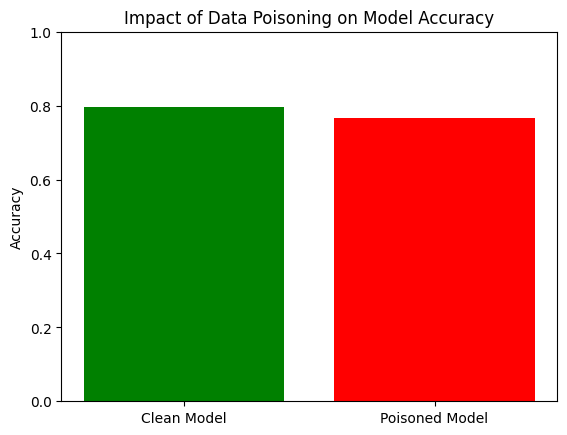

In [1]:
# Step 1: Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

# Step 2: Generate synthetic dataset for predictive maintenance
def generate_data(n_samples=1000):
    np.random.seed(42)
    # Features: [engine_temperature, hydraulic_pressure, vibration_level, flight_hours]
    X = np.random.rand(n_samples, 4) * [100, 3000, 10, 500]  # Different ranges for each feature
    # Target: 0 = No Maintenance Needed, 1 = Maintenance Needed
    y = np.random.choice([0, 1], size=n_samples, p=[0.8, 0.2])
    return X, y

# Generate the dataset
X, y = generate_data()

# Step 3: Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 4: Train a Random Forest model on clean data
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Evaluate the model on the clean test set
y_pred_clean = rf_model.predict(X_test)
print("Accuracy on clean test set:", accuracy_score(y_test, y_pred_clean))
print("Classification report on clean test set:")
print(classification_report(y_test, y_pred_clean))

# Step 5: Conduct a Red Team Test - Data Poisoning
# Introduce fault injection: modify labels and features in the training data to simulate a data poisoning attack
def poison_data(X, y, poison_fraction=0.1):
    n_poison = int(poison_fraction * len(y))
    poisoned_indices = np.random.choice(len(y), n_poison, replace=False)

    # Flip the labels for poisoned data
    y_poisoned = y.copy()
    y_poisoned[poisoned_indices] = 1 - y_poisoned[poisoned_indices]  # Flip 0 to 1 and 1 to 0

    # Add noise to the features to simulate sensor faults
    X_poisoned = X.copy()
    noise = np.random.normal(0, 0.1, X_poisoned[poisoned_indices].shape) * X_poisoned[poisoned_indices]
    X_poisoned[poisoned_indices] += noise  # Add small noise to the features

    return X_poisoned, y_poisoned

# Poison a portion of the training data
X_train_poisoned, y_train_poisoned = poison_data(X_train, y_train, poison_fraction=0.2)

# Step 6: Retrain the Random Forest model on the poisoned data
rf_model_poisoned = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model_poisoned.fit(X_train_poisoned, y_train_poisoned)

# Evaluate the model on the clean test set after poisoning
y_pred_poisoned = rf_model_poisoned.predict(X_test)
print("\nAccuracy on test set after data poisoning:", accuracy_score(y_test, y_pred_poisoned))
print("Classification report on test set after data poisoning:")
print(classification_report(y_test, y_pred_poisoned))

# Step 7: Visualize the impact of the poisoning
labels = ['Clean Model', 'Poisoned Model']
accuracy = [accuracy_score(y_test, y_pred_clean), accuracy_score(y_test, y_pred_poisoned)]

plt.bar(labels, accuracy, color=['green', 'red'])
plt.title('Impact of Data Poisoning on Model Accuracy')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.show()
